In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.drop(['Channel','Region'], axis = 1, inplace = True)

In [5]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [8]:
data.shape

(440, 6)

In [9]:
data.iloc[[100,200,300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [10]:
# fresh filter 
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1,:].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [11]:
frozen_q1 = 742.250000

display(data.loc[data.Frozen < frozen_q1,:].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [12]:
frozen_q3 = 3554.250000

display(data.loc[data.Frozen >frozen_q3, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523


In [13]:
indices = [43,12,39]

samples = pd.DataFrame(data.loc[indices]).reset_index(drop = True)

samples.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


In [14]:
mean_data = data.describe().loc['mean',:]
sample_bar= samples.append(mean_data) 
sample_bar.index = indices + ['mean']

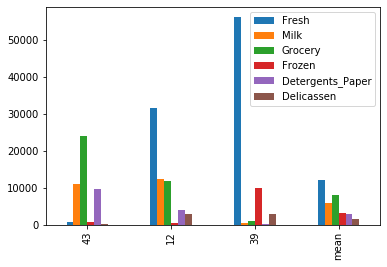

In [15]:
sample_bar.plot(kind = 'bar')

In [16]:
percentile = data.rank(pct= True)
percentile = round((100 * percentile),3)

In [17]:
percentile.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,66.364,83.864,65.000,7.500,68.182,62.955
1,44.091,84.773,71.818,54.545,70.455,74.091
2,41.591,82.045,65.909,63.636,72.273,98.864
3,67.727,18.750,46.591,87.955,40.682,74.773
4,85.682,64.773,63.636,77.500,62.955,96.818


In [18]:
samp = percentile.iloc[indices]

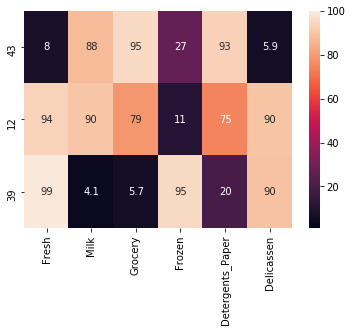

In [19]:
sns.heatmap(samp, vmin = 1 , vmax = 100, annot = True)

In [20]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [21]:
dep_var = list(data.columns)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [22]:
for var in dep_var:
    new_data = data.drop([var], axis = 1)
    feature  = pd.DataFrame(data.loc[:,var])
    X_train,X_test,y_train,y_test = train_test_split(new_data,feature, test_size = 0.2, random_state = 0)
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train,y_train)
    score = dtr.score(X_test,y_test)
    print('R2 score for {} variable is {}'.format(var,score))
    
# From the R2 values for each varible we can say that Fresh, Frozen and Delicassen are the important variable for the customer
# behavior prediction compared to Grocery and Dentergent paper.

R2 score for Fresh variable is -0.28794576859997556
R2 score for Milk variable is 0.19462786084612818
R2 score for Grocery variable is 0.6823287299513665
R2 score for Frozen variable is 0.3043321533428541
R2 score for Detergents_Paper variable is 0.702781098689599
R2 score for Delicassen variable is -19.026565475788622


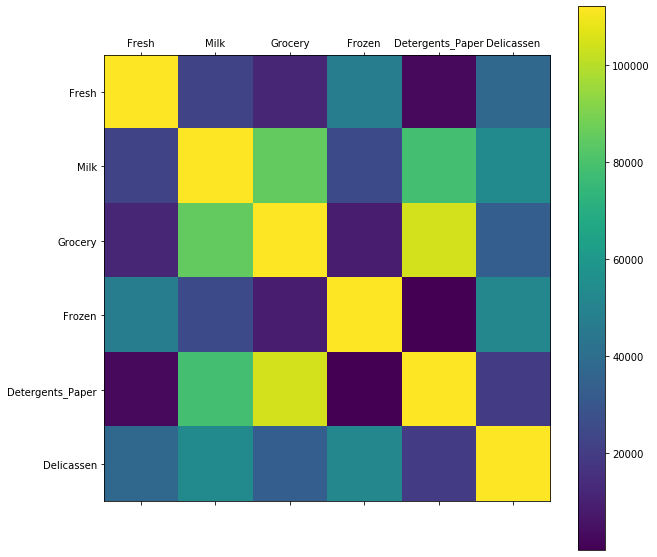

In [23]:
# COrrelation Matrix 


def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)


# Milk and detergent Paper
# Milk and Grocery
# Grocery and detergent paper are correlated to each other
# This proves that Grocery and Detergent paper may not be necessary for the indentifying customer spending habits.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1AC479630>,
      dtype=object)

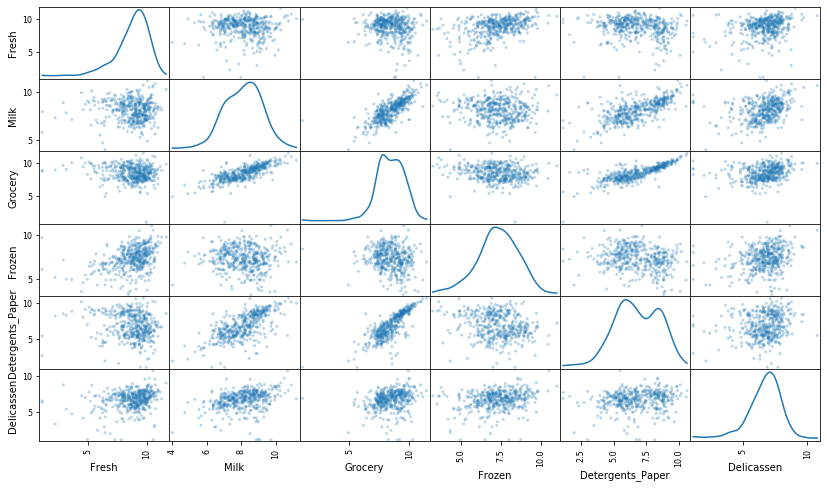

In [32]:
log_data = np.log(data)
log_samples = np.log(samples)
pandas.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal  = 'kde' )

In [33]:
# Displaying log scaled data 

display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


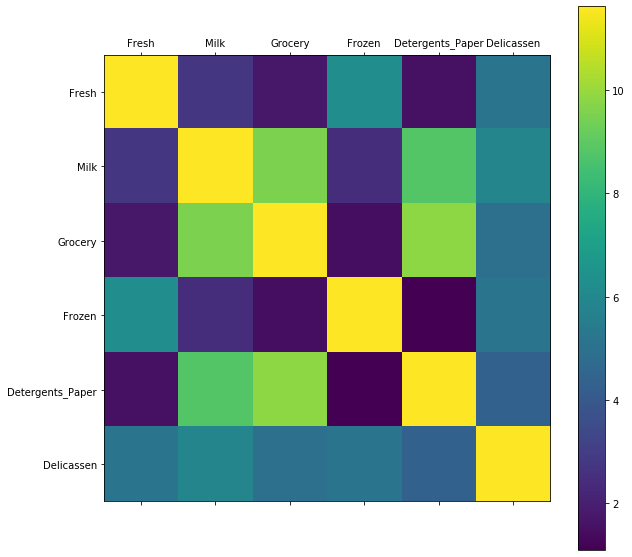

In [34]:
plot_corr(log_data)

# Grocery and milk has stronger correlation
# Grocery and detergent paper is slightly weak correlation
# Detergent paper and milk are correlated 

In [35]:
# Outlier Detection
import itertools

outiler_list = []

for feature in log_data.columns:
    
    Q1 = np.percentile(log_data.loc[:,feature], 25)
    Q3 = np.percentile(log_data.loc[:,feature],75)
    step = 1.5 *(Q3 - Q1)
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    #display(outliers_rows)
    outiler_list.append(list(outliers_rows.index))
    

outliers = list(itertools.chain.from_iterable(outiler_list))
# We will use set to get the list of the unique outliers.

unique_outliers = list(set(outliers))
duplicate_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print('Outlier list:\n',unique_outliers)
print('Length of the outlier list is:\n', len(unique_outliers))

print('Duplicate list:\n',duplicate_outliers)
print('Length of the Duplicate list is:\n', len(duplicate_outliers))

    

Outlier list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of the outlier list is:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of the Duplicate list is:
 5


In [36]:
# Lets drop duplicate data 
final_data = log_data.drop(log_data.index[duplicate_outliers]).reset_index(drop = True)

print('Original data:\n', data.shape)

print('Processed data:\n',final_data.shape)

Original data:
 (440, 6)
Processed data:
 (435, 6)


In [37]:
# Feature Transformation
# Implementation of PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(final_data)
reduced_data = pca.transform(final_data)
pca_samples  = pca.transform(log_samples)
reduced_data = pd.DataFrame(reduced_data, columns= ['Dimention 1','Dimention 2'])


In [38]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.1072,2.7017
1,-2.2406,-1.2419
2,3.0426,-2.5854


In [39]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
#Creating range of the cluster range 

range_of_clusters = list(range(2,11))
print(range_of_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [41]:
# GMM Implementation

for n_cluster in range_of_clusters:
    clusterer = GMM(n_components= n_cluster).fit(reduced_data)
    pred = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,pred,metric= 'mahalanobis')
    print('for n_cluster = {} the average silhouette_score is :{}'.format(n_cluster,score))
    
    
# The best score observed is for number of cluster = 2

for n_cluster = 2 the average silhouette_score is :0.37598604546578696
for n_cluster = 3 the average silhouette_score is :0.36638738533011384
for n_cluster = 4 the average silhouette_score is :0.30335544699918454
for n_cluster = 5 the average silhouette_score is :0.3264609804790072
for n_cluster = 6 the average silhouette_score is :0.30671647735725777
for n_cluster = 7 the average silhouette_score is :0.32386500282076636
for n_cluster = 8 the average silhouette_score is :0.2526653580966588
for n_cluster = 9 the average silhouette_score is :0.3066814157030951
for n_cluster = 10 the average silhouette_score is :0.30348144562267837


In [45]:
clusterer = GMM(n_components=2).fit(reduced_data)
pred      = clusterer.predict(reduced_data)
centers   = clusterer.means_
sample_pred = clusterer.predict(pca_samples)

In [47]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns= data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


In [48]:
# Clusters deviation from median values 

display(true_centers - data.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,435.0,-1519.0,-1997.5,547.0,-464.5,-235.5
Segment 1,-4937.0,4233.0,7493.5,-653.0,3896.5,0.5


In [49]:
# Cluster deviation from mean values 


display(true_centers - data.mean())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-3061.297727,-3688.265909,-5193.277273,-998.931818,-2529.493182,-794.870455
Segment 1,-8433.297727,2063.734091,4297.722727,-2198.931818,1831.506818,-558.870455


In [53]:
# Display Predictions

for i,pred in enumerate(sample_pred):
    print('sample point',i,'is predicted to be in cluster',pred)

sample point 0 is predicted to be in cluster 1
sample point 1 is predicted to be in cluster 1
sample point 2 is predicted to be in cluster 0


In [54]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


In [ ]:
# from above we can say that cluster 1 : indicates customers with higher milk and grocery spendings 
# whereas cluster 0 : indiacates customers with the higher frozen and fresh prodct spendings.